

---

# **下面這儲存格只要執行一次就可以了**


---



In [6]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/mnicnc404/{repo}.git
os.chdir(os.path.join(repo))
!ls | grep cartoonize.py
from IPython.display import clear_output, display, Image
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
clear_output()
import tensorflow as tf
tf.__version__

'2.3.0'

---

# 請在這邊把想要使用的網址填入!!!!

---







In [7]:
image_url = 'https://raw.githubusercontent.com/Keroro0727/Python2020/main/IMG_0259.png'  #@param {type: "string"}

#範例gif:  https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
#範例png:  https://n.sinaimg.cn/sinakd10118/341/w650h491/20200821/7923-iyaiihk8459061.png

In [8]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")

import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}
if ".png" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

--2020-12-08 06:42:14--  https://raw.githubusercontent.com/Keroro0727/Python2020/main/IMG_0259.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 722913 (706K) [image/png]
Saving to: ‘IMG_0259.png’

IMG_0259.png        100%[===================>] 705.97K  --.-KB/s    in 0.02s   

2020-12-08 06:42:14 (33.0 MB/s) - ‘IMG_0259.png’ saved [722913/722913]





---
# **顯示使用的gif或png**



---



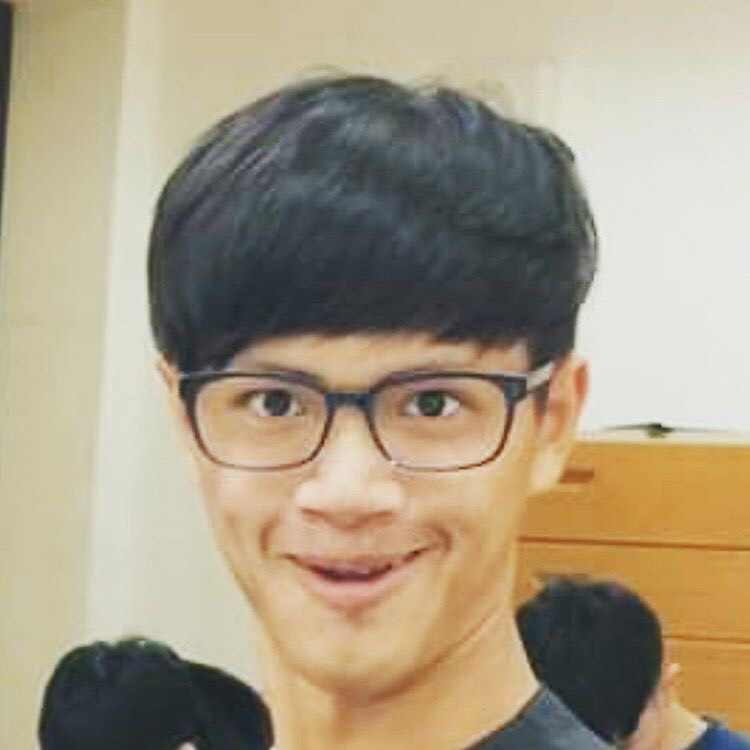

In [9]:
display(Image(png_path))



---

# **選擇要轉換的風格種類**

shinkai:新海誠

hayao:宮崎駿

hosoda:細田守

paprika:甜椒花

---



In [10]:
styles = "shinkai" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [ ]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal
clear_output()

2020-12-08 06:42:15.631106: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
[2020-12-08 06:42:17] [Cartoonizer] [INFO] Transformed images will be saved to `output_images` folder.
2020-12-08 06:42:17.082268: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-08 06:42:17.136912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-08 06:42:17.137550: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-08 06:42:17.137594: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dyna

In [ ]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)



---

# **顯示成果**



---



In [ ]:
display(Image(result_path))